In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from sklearn.cluster import KMeans
from collections import Counter
import glob

In [2]:
def get_domain_color(image, k =10, n = 3):
    if k < n:
        raise Exception('Amount of clusters cant be more than number of dominant color.')
    image = image.reshape((image.shape[0]*image.shape[1], 3))
    clt = KMeans(n_clusters=k,algorithm= 'auto')
    labels = clt.fit_predict(image)
    label_counter = Counter(labels)
    dominant_clrs = []
    for i in np.arange(0,n):
        dominant_clrs.append(clt.cluster_centers_[label_counter.most_common(n)[i][0]])
    return dominant_clrs

In [3]:
def analyse_img(name, way):
    data = []
    fn = name 
    img = cv2.imread(fn)
    img = cv2.resize(img, (480,360))
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Dominant colors
    n_clusters = 8
    dom_col = get_domain_color(img, k = n_clusters, n = n_clusters)[0:5]
    dom_clr = np.zeros([img.shape[0], 1,3], dtype = 'uint8')
    for i in np.arange(0,5):
        data.append(dom_col[i][0])
        data.append(dom_col[i][1])
        data.append(dom_col[i][2])
        dom_clr = np.hstack((dom_clr,np.full((img.shape[0], img.shape[1]//5,3), dom_col[i], dtype = 'uint8')))
    out_img = np.hstack((img, dom_clr))
    cv2.imwrite(way + './dom_clr/'+name.split('/')[len(name.split('/'))-1],out_img)
    # Picture contours filling
    canny = cv2.Canny(imgray, 120, 50)
    filling = np.zeros((3,3))
    for line in np.arange(0,3):
        for column in np.arange(0,3):
            data.append(canny[120*column:120*(column+1)-1,160*line:160*(line+1)-1].mean()/255)
    #corners count
    dst = cv2.cornerHarris(imgray, 2, 3, 0.04)
    dst = cv2.dilate(dst,None)
    data.append(img[dst>0.1*dst.max()].shape[0])
    #count elipses
    contours0, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    elipse_count = 0
    for cnt in contours0:
        if len(cnt)>10 and len(cnt)<480:
            elipse_count +=1
    data.append(elipse_count)
    return np.array(data)

True

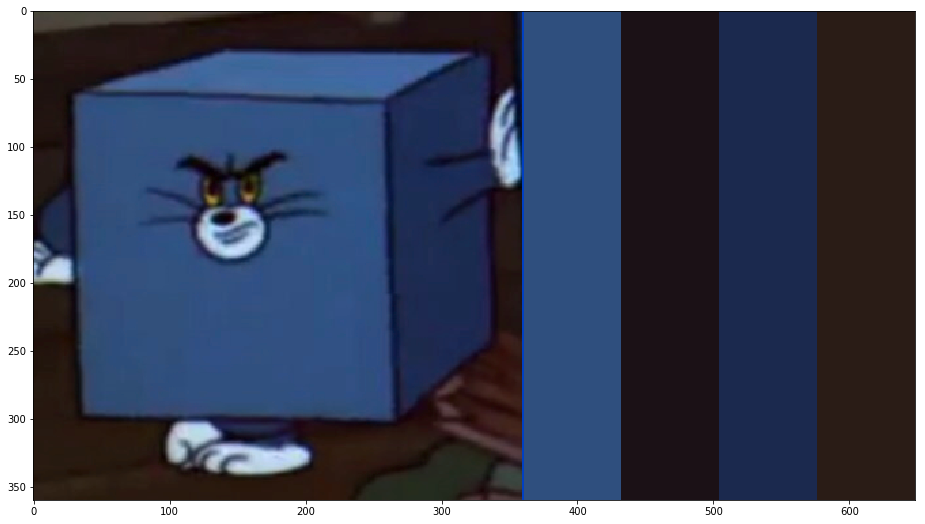

In [4]:
plt.figure(figsize=(16,9))
img = cv2.imread('pic1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.resize(img, (360,360))
n_clusters = 8
dom_col = get_domain_color(img, k = n_clusters, n = n_clusters)
dom_clr = np.zeros([img.shape[0], 1,3], dtype = 'uint8')
for i in np.arange(0,4):
    dom_clr = np.hstack((dom_clr,np.full((img.shape[0], img.shape[1]//5,3), dom_col[i], dtype = 'uint8')))
out_img = np.hstack((img, dom_clr))
plt.imshow(dom_clr)
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_LAB2RGB))
cv2.imwrite('im1.png',cv2.cvtColor(out_img, cv2.COLOR_LAB2BGR))

[[0.53242429 0.25336927 0.62681676]
 [0.32820675 0.12747741 0.36932509]
 [0.74160985 0.81877279 0.88446699]]


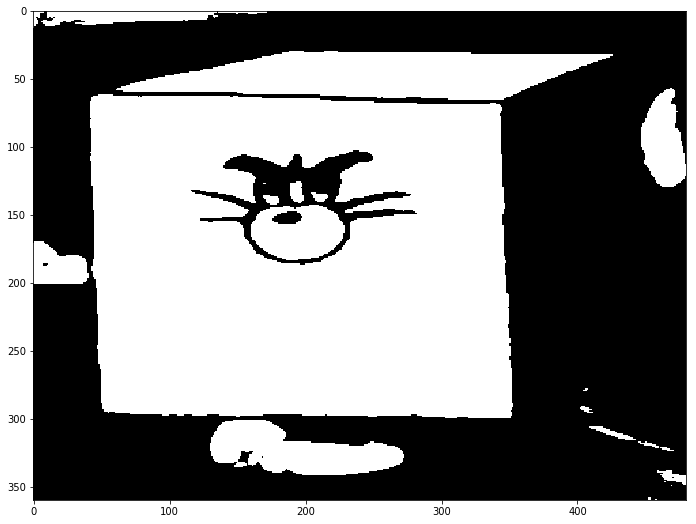

In [5]:
plt.figure(figsize=(16,9))
img = cv2.imread('pic1.png')
img = cv2.resize(img, (480,360))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binary_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(binary_img, cmap = 'binary_r')

filling = np.zeros((3,3))
for line in np.arange(0,3):
    for column in np.arange(0,3):
        filling[line,column] = 1 - binary_img[120*column:120*(column+1)-1,160*line:160*(line+1)-1].mean()/255
print(filling)

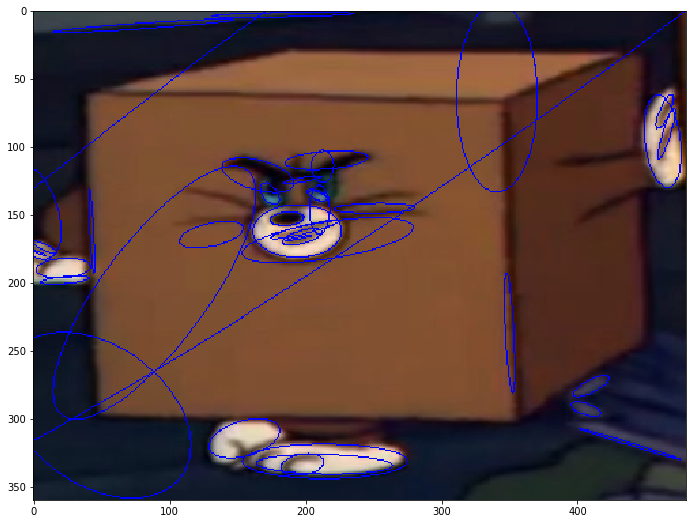

In [6]:
plt.figure(figsize=(16,9))
fn = 'pic1.png' 
img = cv2.imread(fn)
img = cv2.resize(img, (480,360))
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(imgray, 120, 50)
plt.imshow(canny,cmap = 'binary')

contours0, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours0:
    rect = cv2.minAreaRect(cnt) 
    box = cv2.boxPoints(rect) 
    box = np.int0(box) 
    area = int(rect[1][0]*rect[1][1]) 
    #if area > 500:
        #cv2.drawContours(img,[box],0,(255,0,0),2)
    if len(cnt)>10 and len(cnt)<480:
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(img,ellipse,(0,0,255),1)

plt.imshow(img)

90


True

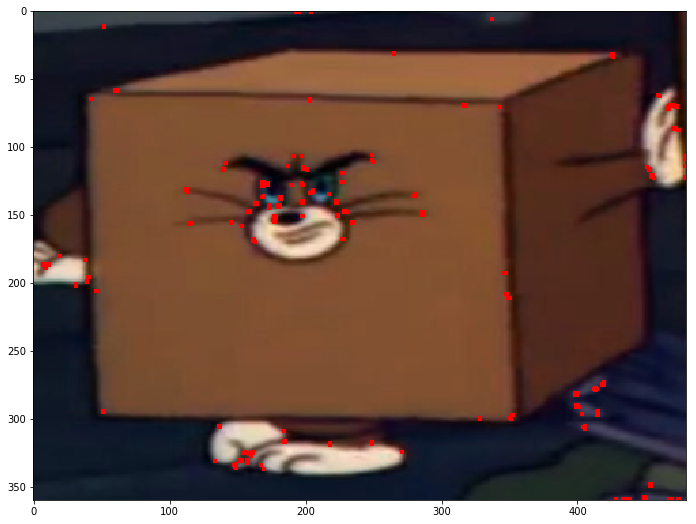

In [15]:
fn = 'pic1.png' 
plt.figure(figsize=(16,9))
img = cv2.imread(fn)
img = cv2.resize(img, (480,360))
#imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#canny = cv2.Canny(imgray, 50, 30)
binary_img = cv2.threshold(imgray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
dst = cv2.cornerHarris(binary_img, 2, 3, 0.04)
dst = cv2.dilate(dst,None)
img[dst>0.10*dst.max()]=[255,0,0]
print(img[dst>0.90*dst.max()].shape[0])
plt.imshow(img)

True

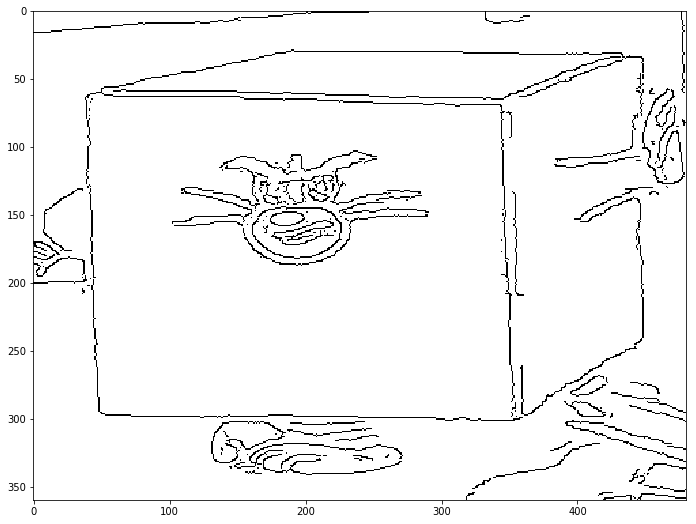

In [11]:
plt.figure(figsize=(16,9))
fn = 'pic1.png' 
img = cv2.imread(fn)
img = cv2.resize(img, (480,360))
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(imgray, 50, 30)
plt.imshow(canny,cmap = 'binary')